# THE SPARKS FOUNDATION GRIP PROGRAM(APRIL-2021)

**Data Science & Business Analytics Internship**

**Task-3 : EDA-Retail.**

As a business manager, try to find out the weak areas where you can work to make more profit.

**By: Rishita**

In [14]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [15]:
#importing the dataset
data=pd.read_csv('SampleSuperstore.csv')
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Data is imported successfully**

In [16]:
#shape of the dataset
data.shape

(9994, 13)

In [17]:
#Checking if there are any null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**We can see that there are no null values in our dataset**


In [18]:
#replacing Profit with Profit Percentage and Droping Sales and Profit
data['Profit%']=(data['Profit']/data['Sales'])*100
data.drop(['Profit','Sales'],axis=1,inplace=True)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,2,0.00,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,3,0.00,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,2,0.00,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5,0.45,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,2,0.20,11.25


**We can see that profit % is having negative value which means a loss.**

In [19]:
#statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.0,23223.0,56430.5,90008.00,99301.0
Quantity,9994.0,3.789574,2.225110,1.0,2.0,3.0,5.00,14.0
Discount,9994.0,0.156203,0.206452,0.0,0.0,0.2,0.20,0.8
Profit%,9994.0,12.031393,46.675435,-275.0,7.5,27.0,36.25,50.0


<AxesSubplot:xlabel='Segment', ylabel='count'>

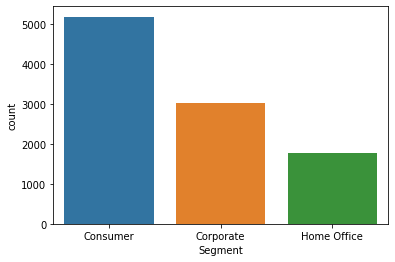

In [20]:
#Types of Segments
sns.countplot(data['Segment'])

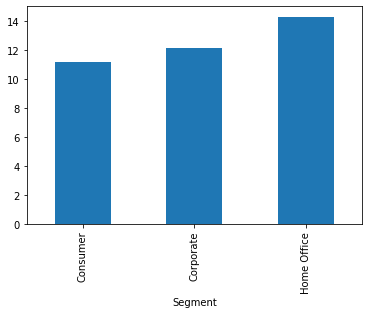

In [21]:
#Segments with respect to Average value of Profit%
df=data.copy()
df.groupby('Segment')['Profit%'].mean().plot.bar()
plt.show()

**Segment with lowest profit: Consumer**

In [22]:
#Making 3 different datasets for Individual Segments
consumer_data=data[data['Segment']=='Consumer']
corporate_data=data[data['Segment']=='Corporate']
office_data=data[data['Segment']=='Home Office']

In [23]:
#Finding the unique values 
for feature in data.columns:
    if data[feature].dtypes=='O':
        print(feature,len(data[feature].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Region 4
Category 3
Sub-Category 17


In [24]:
#useful features
features=['State','Category','Sub-Category',]

# Consumer Segment

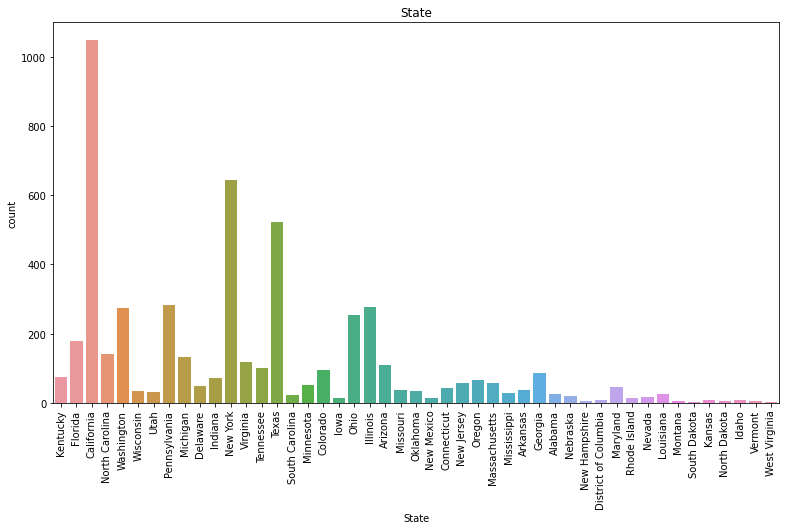

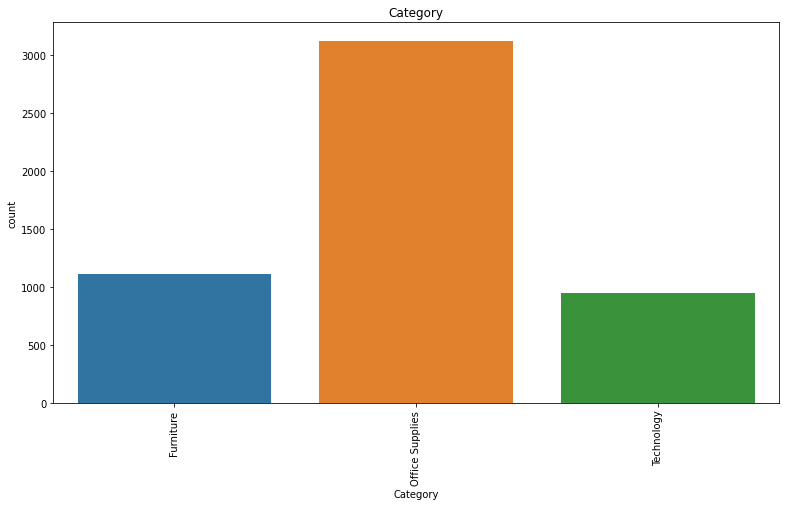

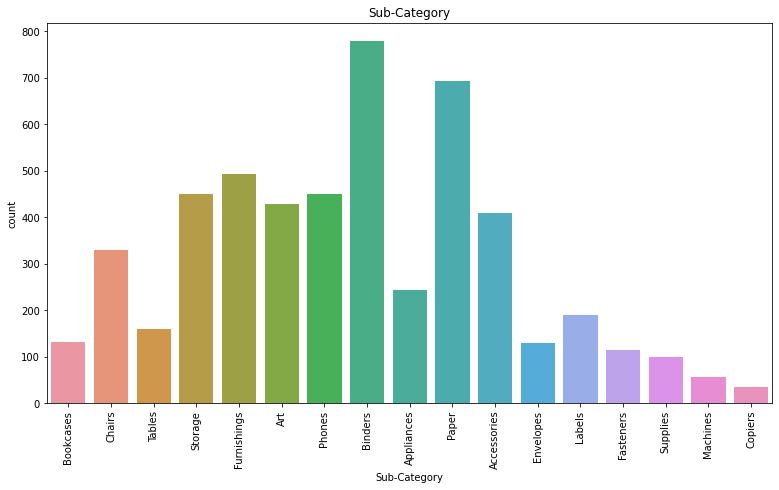

In [25]:
#No. of transactions for each category
for feature in features:
    df=consumer_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()

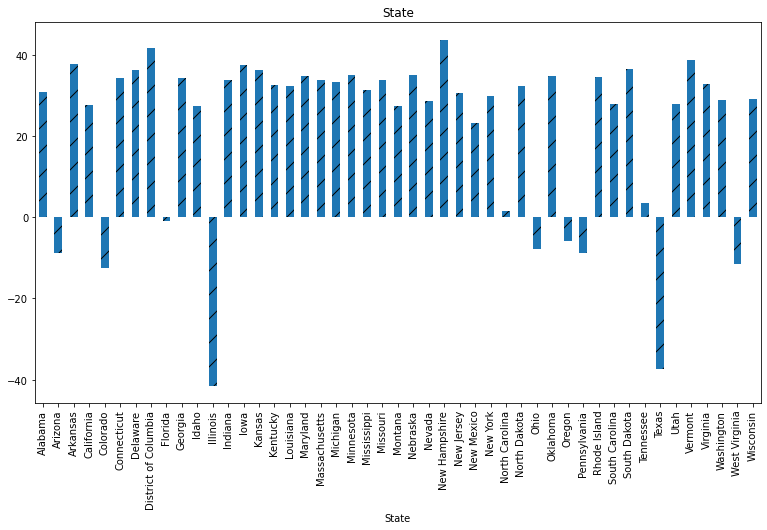

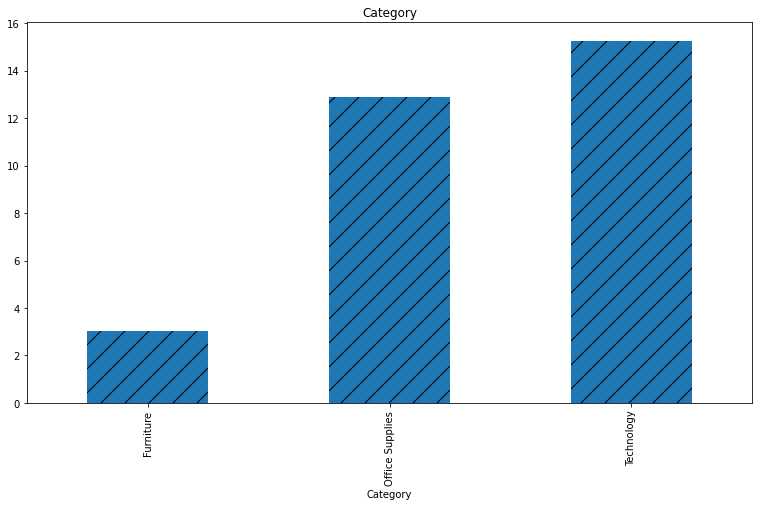

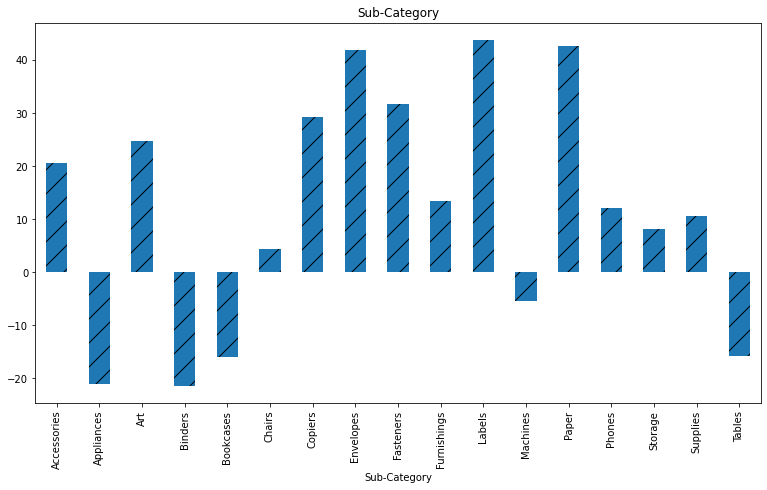

In [26]:
for feature in features:
    df=consumer_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()

**Categories with negative profit**
**Furniture has low profit**
**State - ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']**
**Sub-Category - ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables']**



# Corporate Segment

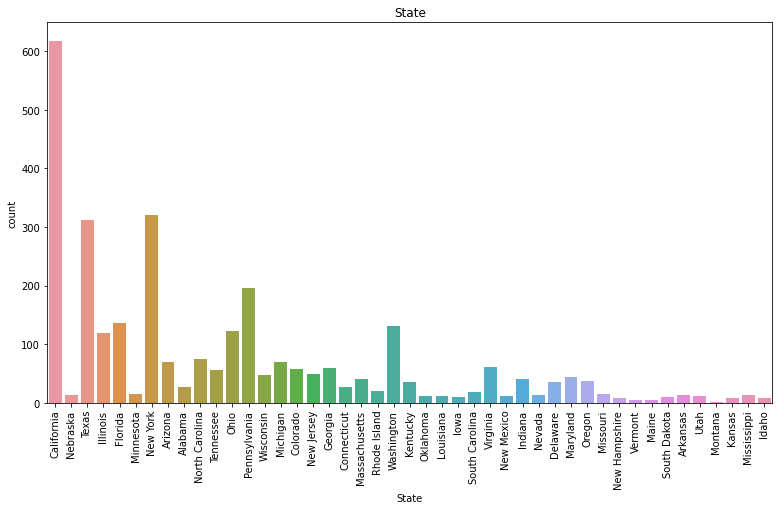

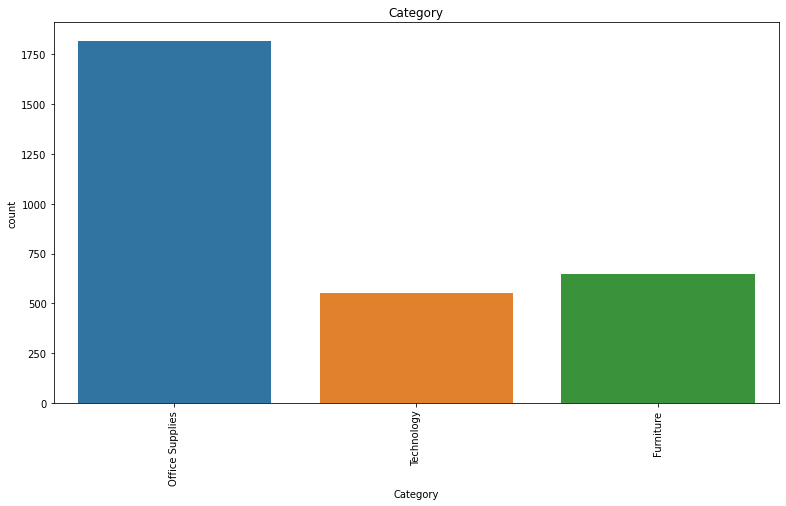

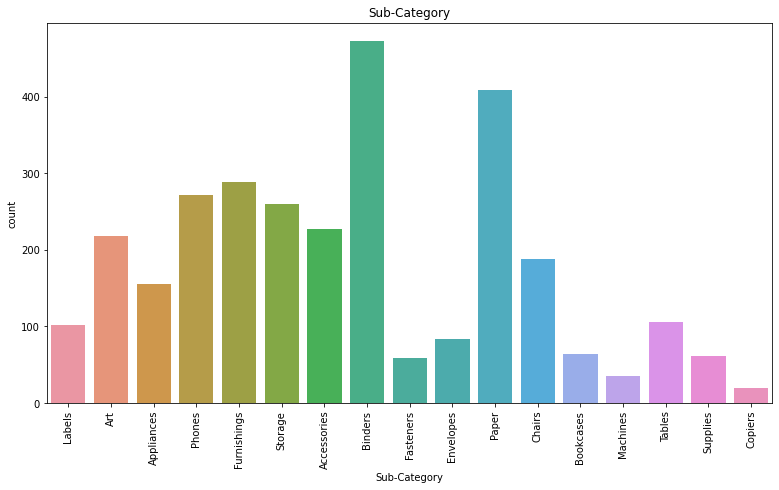

In [27]:
for feature in features:
    df=corporate_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()
    

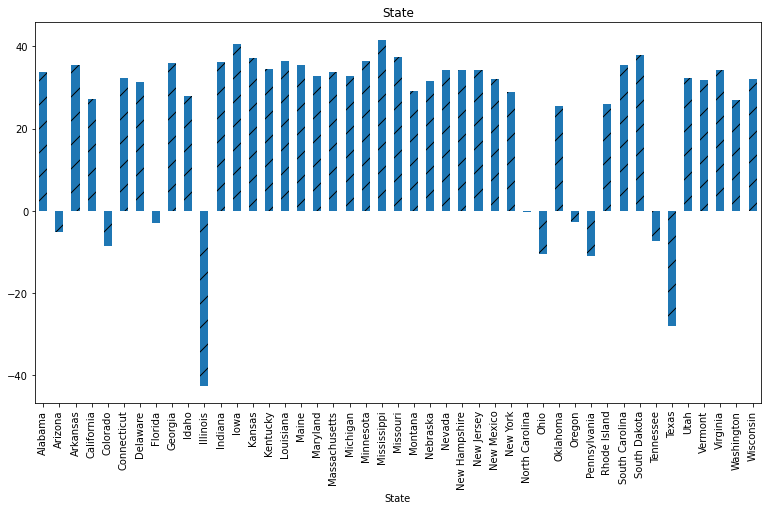

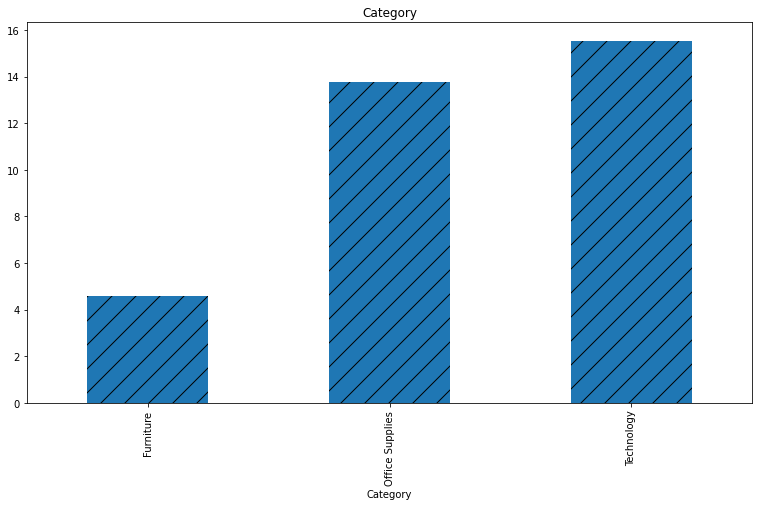

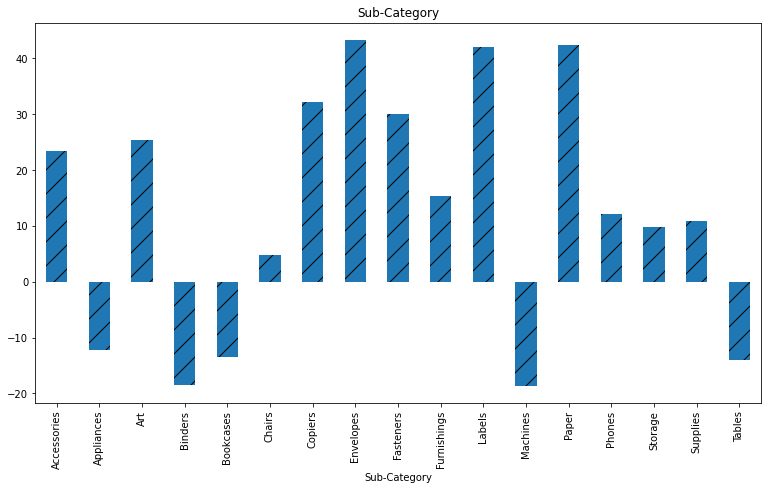

In [28]:
for feature in features:
    df=corporate_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()

**Categories with negative profit:**

**State - ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']**

**Sub-Category - ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables']**

# Home Office Segment

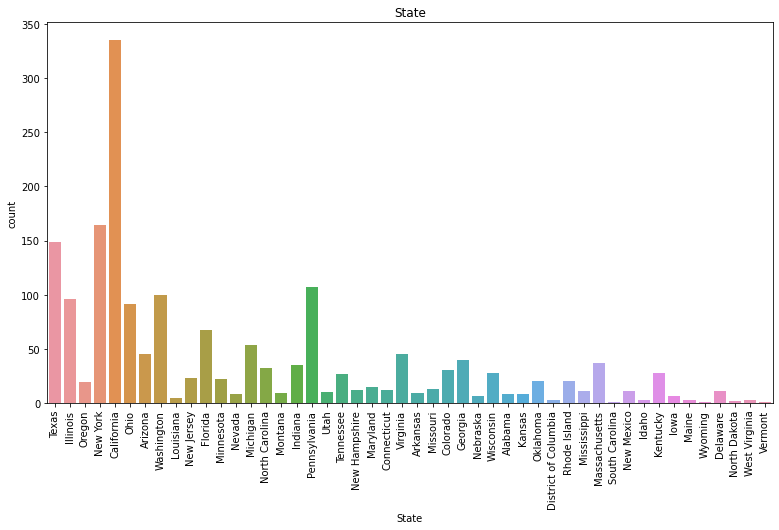

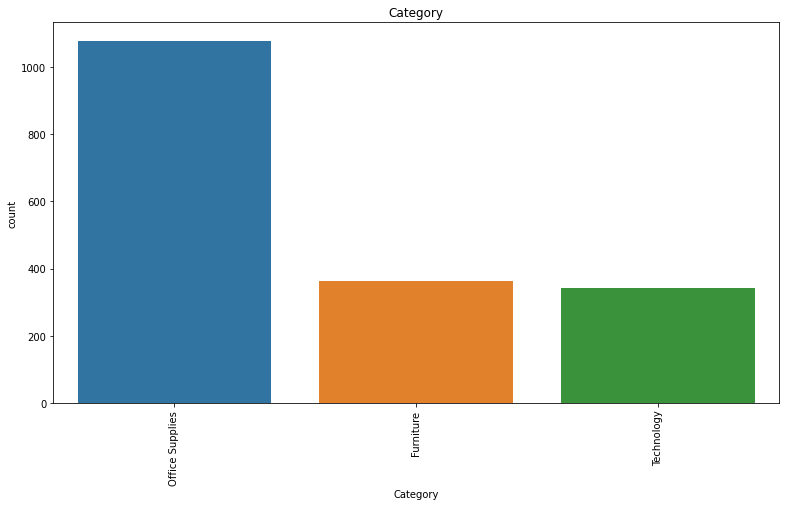

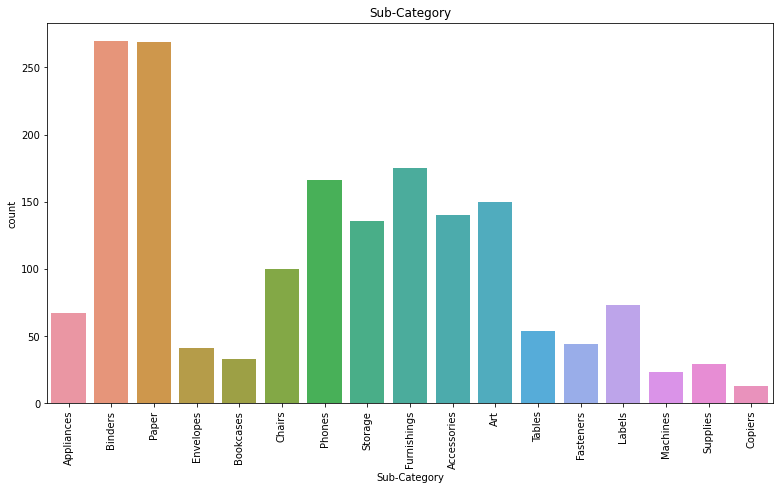

In [29]:
for feature in features:
    df=office_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()

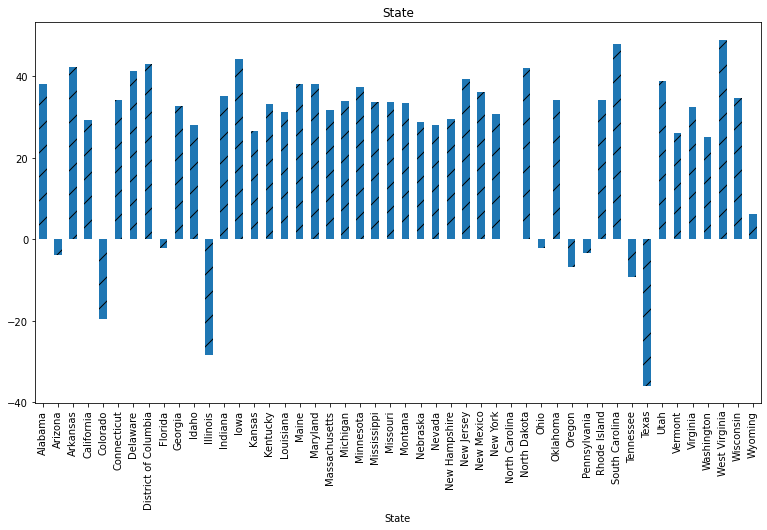

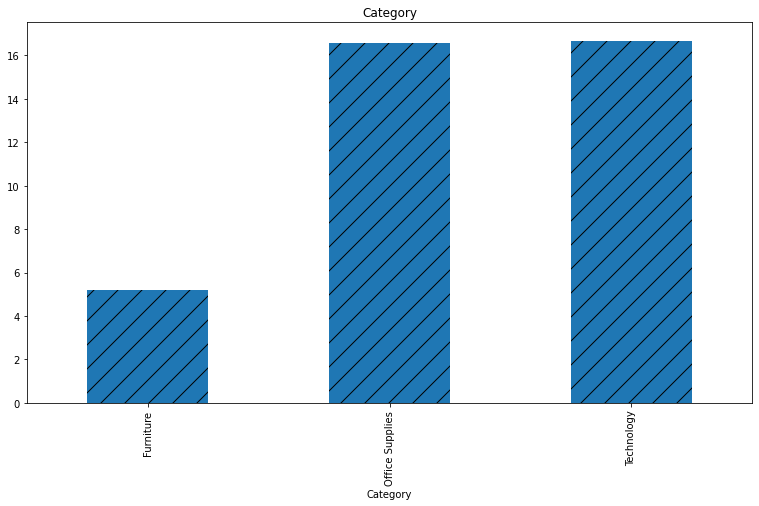

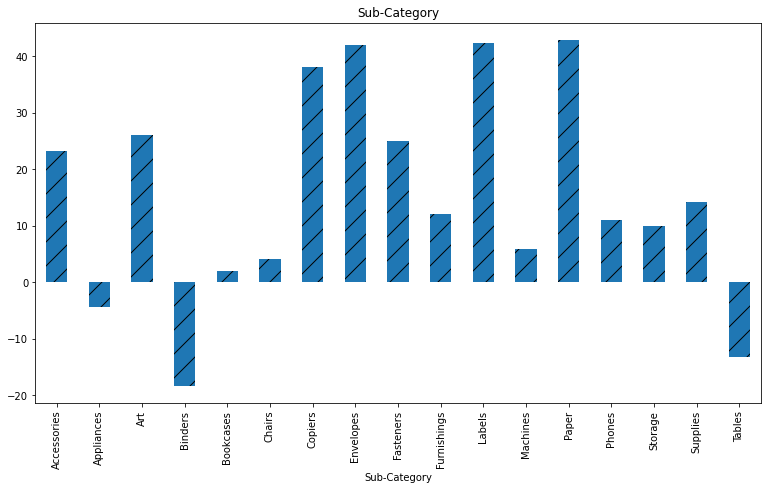

In [30]:
for feature in features:
    df=office_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()


**Categories with negative profit:**
**State['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']**

**Sub-Category - ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables']**

In [31]:
data.corr()

,Postal Code,Quantity,Discount,Profit%
Postal Code,1.000000,0.012761,0.058443,-0.064404
Quantity,0.012761,1.000000,0.008623,-0.005280
Discount,0.058443,0.008623,1.000000,-0.864452
Profit%,-0.064404,-0.005280,-0.864452,1.000000


<AxesSubplot:xlabel='Discount', ylabel='Profit%'>

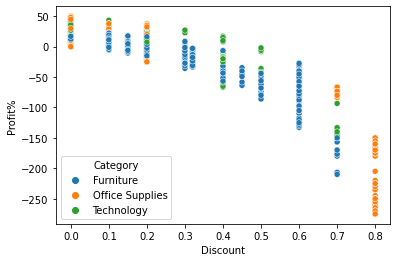

In [32]:
#plotting discount,profit%
sns.scatterplot(x='Discount',y='Profit%',data=data,hue='Category')

**From the above scatterplot, we can conclude that there is a negative correlation between the discount and profit %**

# Conclusion

**1.) The furniture is giving very less profit so the sales of furniture should be increased.**

**2.) Some states such as Arizona, Colorado, Florida, Illinois, Ohio, Oregon, Pennsylvania, Texas, West Virginia are giving negative profit so the sales for these states should be increased.**

**3.) Sub-Categories like Appliances, Binders, Bookcases, Machines, Tables are also giving negative Profit. This is mainly because the office supplies category is giving high discounts so lessening the discount may serve the purpose.**

**4.) Technology dept. is having the lowest sales still it is providing the highest profit, so increasing sales of the products under technology dept. will give our superstore fruitful gains.**